In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from PIL import Image

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path+"\\code")
    
from map_plot import map_plotting

In [6]:
def maptrue():
    basewidth = 600
    true = Image.open('../output_files/map_y.png')
    wpercent = (basewidth/float(true.size[0]))
    hsize = int((float(true.size[1])*float(wpercent)))
    true = true.resize((basewidth,hsize), Image.ANTIALIAS)

    print('True EV Percentage')
    display(true)
    
def maplot(map_img, title):
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(map_img[0])
    ax[1].imshow(map_img[1])
    ax[0].title.set_text(title[0])
    ax[1].title.set_text(title[1])
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_xticks([])
    ax[1].set_yticks([])

### Project policy implementation

The use of machine learning algorithms in the field of transportation choice modeling is narrow, as reflected by the limited amount of papers published on that matter. Instead, there is extensive use of discrete choice models, namely, logistic regression.

In this project, we evaluated the performance of the traditional logistic regression compared with several machine learning algorithms. In the framework of this project, where we predict the vehicle ownership in California by powertrain type (ICEV or EV), we focus on the ability of a model to minimize false positive rate, where the model predicts EV instead of true ICEV. With the tremendous taxpayer costs, the EV charging system requires, with charging installation by the state and electricity upgrades in rural and in urban areas of CA, it is important for energy policymakers and transportation planners need to work with models that maximize true prediction rate while minimizing the EV false predictions.

As a complementary tool for our statistical analysis, we present here maps showing the true and prediction EV rates for the six regions of California, as used by the California Energy Commission (Sacramento, San Francisco, Central Valley, Los Angeles, San Diego, and the rest of the state). These maps can be presented for the decision-makers, where we visualize our main conclusions – the traditional logistic regression might overestimate the ownership of EV, and can be costly to the state. Therefore, there is room for machine learning modeling, and the investment in such tools can be beneficial in the long-term.

### Conclusions from the maps

In the ‘Performance’ notebook we concluded that the SMOTE oversampling technique achieved the most desirable performance for our modeling needs, with FPR minimazition and TPR maximization. Therefore, the maps shown here are for all models with SMOTE.

According to the survey, the current EV market share, by regions, spans between 3 to 17 percent. According to the logistic regression model, the share spans between 17 to 24 percent, which raises questions regarding the quality of the traditional modeling techniques.

While the survey revealed that the EV share in Central valley is the lowest, with only 3.3 percent, and in San Diego is second to lowest, with 6.7 percent, all the ML models predicted these two regions with the highest EV ownership. That raises the questions regarding the variable choice we made, and the need to optimize it. Besides these two regions, all the ML models show similar trends and relationships between the other four regions, where the two main metropolitan areas of California, San Francisco, and Los Angeles, are predicted to have a higher EV share than of Sacramento and the rest of the state.

Overall, the results of this project will be considered in the project proposals related to the analysis of the 2019 California Vehicle Survey prepared by the PHEV Research Centre at UC Davis.


True EV Percentage


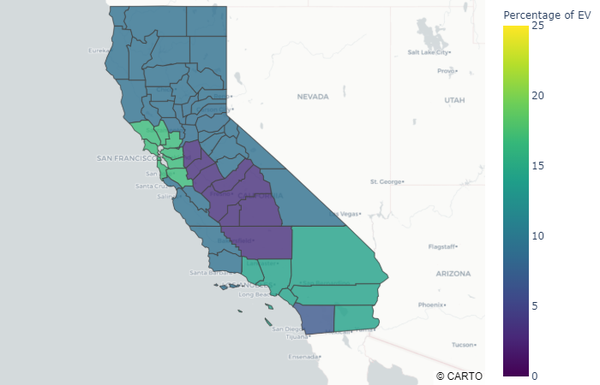

In [7]:
maptrue()

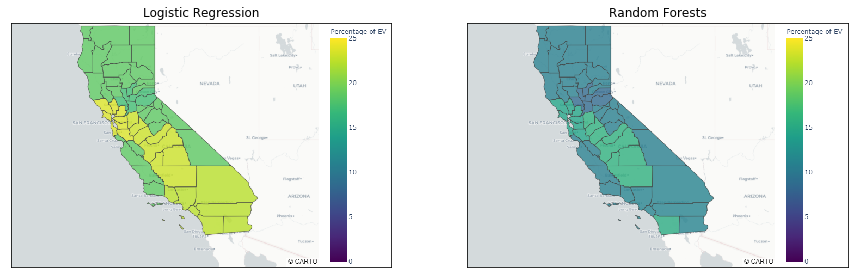

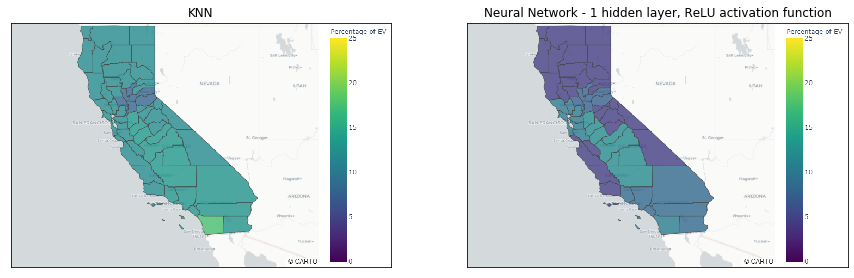

In [10]:
map_img = [mpimg.imread('../output_files/map_y_pred_log_smote.png'), mpimg.imread('../output_files/map_y_pred_rf_smote.png')]
title = ['Logistic Regression','Random Forests']
maplot(map_img, title)

map_img = [mpimg.imread('../output_files/map_y_pred_knn_smote.png'), mpimg.imread('../output_files/map_y_pred_nn_smote.png')]
title = ['KNN','Neural Network - 1 hidden layer, ReLU activation function']
maplot(map_img, title)

In [9]:
# example code to get the smote random forests prediction interaction map:
# map_plotting('rf_smote','y_pred')